<h1>Pengolahan Citra Digital</h1>

In [109]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [113]:
img = cv2.imread("Pisang.jpeg")

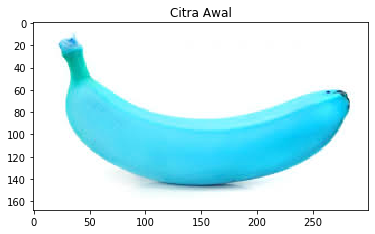

In [114]:
pisang = cv2.imread("Pisang.jpeg")
plt.title('Citra Awal')
plt.imshow(pisang)
plt.show()

In [112]:
#menampilkan dimensi array gambar
img.shape

(7, 11, 3)

In [97]:
grayscale = []

for i in img :
    row = []
    for j in i :
        row.append((j[0]+j[1]+j[2])/3)
    grayscale.append(row)
        

C:\Users\Vira Shania B\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


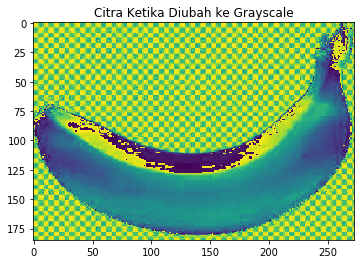

In [98]:
plt.title('Citra Ketika Diubah ke Grayscale')
plt.imshow(grayscale)
plt.show()

In [99]:
gsNp = np.array(grayscale)
h,w = np.shape(gsNp)
t=1 #initial condition
g1 = []
g2 = []

#calculating t by algorithm
while(1):
    for px in range(0,h):
        for py in range(0,w):
            if (gsNp[px][py] < t):
                g1.append(gsNp[px][py])
            else:
                g2.append(gsNp[px][py])
    mu1 = sum(g1) / len(g1)
#     print(g2)
    mu2 = sum(g2) / len(g2)
    t0=t
    t = ((mu1+ mu2)/2)
    delta_t = abs(t-t0)
#     print(mu1,mu2,t,delta_t)
    if(delta_t < 1):
        break
rata2 = round(t,0)
print(rata2)

45.0


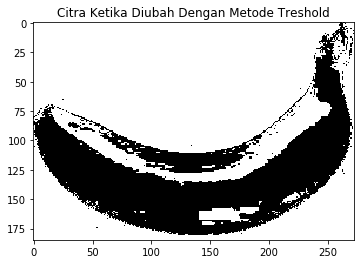

In [100]:
# thres_finder(img)
np.shape(gsNp)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

setelahnya = global_threshold(gsNp,rata2,255,0)
plt.title('Citra Ketika Diubah Dengan Metode Treshold')
plt.imshow(setelahnya, cmap='gray', vmin=0, vmax=255)
plt.show()

In [101]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [102]:
hsv_img.shape

(185, 273, 3)

In [104]:
kualitas = ""
for x in range(0,hsv_img.shape[0]):
    for y in range(0, hsv_img.shape[1]):
        if (hsv_img[x,y,1] < 0.4) and (hsv_img[x,y,2] > 0.55):
            jenis = "Bagus"
        else:
            jenis = "Tidak Bagus"

In [105]:
jenis

'Bagus'

In [106]:
warna = ""
for x in range(0,hsv_img.shape[0]):
    for y in range(0, hsv_img.shape[1]):
        if (hsv_img[x,y,0] > 0.2 and hsv_img[x,y,0] < 0.7) and (hsv_img[x,y,1] > 0.01 and hsv_img[x,y,1] < 0.3) and (hsv_img[x,y,2] > 0.55 and hsv_img[x,y,2] < 0.9):
            warna = "Kuning"
        else:
            warna = "Hijau"

In [107]:
warna

'Hijau'

In [108]:
if jenis == "Bagus":
    if warna == "Kuning":
        print("Pisang Matang")
    else:
        print("Setengah Matang")
else:
    if warna == "Hijau":
        print("Belum Matang")
    else:
        print("Buruk")
    

Setengah Matang
